<a href="https://colab.research.google.com/github/Shaitender/kaggle_notebooks/blob/master/Linear_Regression_Feature_Selector_(AutoML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import featuretools as ft
import pandas as pd
import numpy as np

In [0]:
cars = pd.read_csv("/content/CarPrice_Assignment.csv")

In [8]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
cars_categorical = cars.loc[:, cars.dtypes == object]
cars_categorical.columns


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [0]:
es = ft.EntitySet(id = 'df')

In [6]:
es

Entityset: df
  Entities:
  Relationships:
    No relationships

In [0]:
es = es.entity_from_dataframe(entity_id="cars",
                              dataframe=cars,
                              index="car_ID",                             
                              variable_types={"CarName": ft.variable_types.Categorical,
                                              "fueltype": ft.variable_types.Categorical,
                                              "aspiration": ft.variable_types.Categorical,
                                              "doornumber": ft.variable_types.Categorical,
                                              "carbody": ft.variable_types.Categorical,
                                              "drivewheel": ft.variable_types.Categorical,
                                              "enginelocation": ft.variable_types.Categorical,
                                              "enginetype": ft.variable_types.Categorical,
                                              "cylindernumber": ft.variable_types.Categorical,
                                              "fuelsystem": ft.variable_types.Categorical})

In [14]:
es

Entityset: df
  Entities:
    cars [Rows: 205, Columns: 26]
  Relationships:
    No relationships

In [15]:
es["cars"].variables

[<Variable: car_ID (dtype = index)>,
 <Variable: symboling (dtype = numeric)>,
 <Variable: wheelbase (dtype = numeric)>,
 <Variable: carlength (dtype = numeric)>,
 <Variable: carwidth (dtype = numeric)>,
 <Variable: carheight (dtype = numeric)>,
 <Variable: curbweight (dtype = numeric)>,
 <Variable: enginesize (dtype = numeric)>,
 <Variable: boreratio (dtype = numeric)>,
 <Variable: stroke (dtype = numeric)>,
 <Variable: compressionratio (dtype = numeric)>,
 <Variable: horsepower (dtype = numeric)>,
 <Variable: peakrpm (dtype = numeric)>,
 <Variable: citympg (dtype = numeric)>,
 <Variable: highwaympg (dtype = numeric)>,
 <Variable: price (dtype = numeric)>,
 <Variable: CarName (dtype = categorical)>,
 <Variable: fueltype (dtype = categorical)>,
 <Variable: aspiration (dtype = categorical)>,
 <Variable: doornumber (dtype = categorical)>,
 <Variable: carbody (dtype = categorical)>,
 <Variable: drivewheel (dtype = categorical)>,
 <Variable: enginelocation (dtype = categorical)>,
 <Variabl

In [17]:
features, feature_names = ft.dfs(entityset=es, target_entity='cars', 
                                 max_depth = 2)

features.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [18]:
feature_names

[<Feature: symboling>,
 <Feature: wheelbase>,
 <Feature: carlength>,
 <Feature: carwidth>,
 <Feature: carheight>,
 <Feature: curbweight>,
 <Feature: enginesize>,
 <Feature: boreratio>,
 <Feature: stroke>,
 <Feature: compressionratio>,
 <Feature: horsepower>,
 <Feature: peakrpm>,
 <Feature: citympg>,
 <Feature: highwaympg>,
 <Feature: price>,
 <Feature: CarName>,
 <Feature: fueltype>,
 <Feature: aspiration>,
 <Feature: doornumber>,
 <Feature: carbody>,
 <Feature: drivewheel>,
 <Feature: enginelocation>,
 <Feature: enginetype>,
 <Feature: cylindernumber>,
 <Feature: fuelsystem>]

In [1]:
!pip install feature-selector
#https://github.com/WillKoehrsen/feature-selector/blob/master/Feature%20Selector%20Usage.ipynb

In [0]:
from feature_selector import FeatureSelector
import pandas as pd

In [0]:
train = pd.read_csv('/content/CarPrice_Assignment.csv')


In [6]:

train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [0]:
train_labels = train['price']

In [0]:
train = train.drop(columns = ['price'])

In [0]:
fs = FeatureSelector(data = train, labels = train_labels)

In [10]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



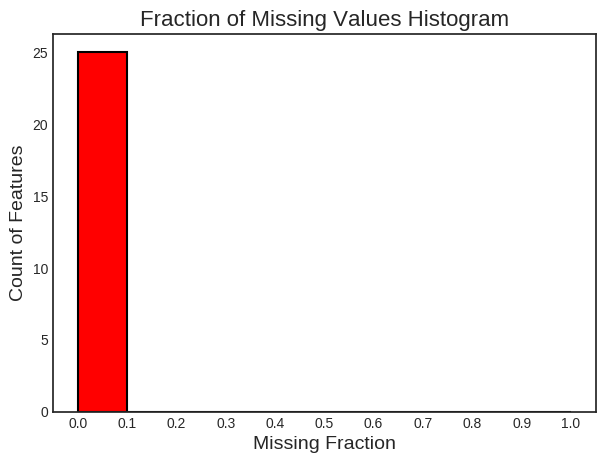

In [11]:
fs.plot_missing()

In [12]:
fs.identify_single_unique()

0 features with a single unique value.



In [13]:
fs.identify_collinear(correlation_threshold=0.975)

0 features with a correlation magnitude greater than 0.97.



In [15]:
fs.identify_zero_importance(task ='regression',
                            eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[201]	valid_0's l2: 3.42815e+06
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[652]	valid_0's l2: 1.02256e+07
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[91]	valid_0's l2: 4.57129e+06
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[988]	valid_0's l2: 2.97415e+06
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[997]	valid_0's l2: 5.94981e+06
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[998]	valid_0's l2: 4.44987e+06
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[495]	valid_0's l2: 9.28223e+06
Training until val

In [16]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 25 original features
There are 185 one-hot features


In [17]:
fs.data_all.head(10)

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,CarName_honda accord,CarName_honda accord cvcc,CarName_honda accord lx,CarName_honda civic,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22


In [18]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features

['CarName_toyouta tercel',
 'CarName_toyota corolla 1600 (sw)',
 'CarName_volkswagen 1131 deluxe sedan',
 'CarName_vokswagen rabbit',
 'CarName_toyota corolla',
 'CarName_toyota corolla 1200',
 'CarName_toyota corolla tercel',
 'CarName_toyota corolla liftback',
 'CarName_toyota tercel',
 'CarName_toyota corona',
 'CarName_toyota corona hardtop',
 'CarName_toyota corona liftback',
 'CarName_toyota corona mark ii',
 'CarName_toyota cressida',
 'CarName_toyota mark ii',
 'CarName_toyota celica gt',
 'CarName_toyota starlet',
 'CarName_toyota celica gt liftback',
 'CarName_subaru brz',
 'CarName_toyota carina',
 'CarName_subaru tribeca',
 'CarName_plymouth valiant',
 'CarName_porcshce panamera',
 'CarName_porsche boxter',
 'CarName_porsche cayenne',
 'CarName_porsche macan',
 'CarName_renault 12tl',
 'CarName_renault 5 gtl',
 'CarName_saab 99e',
 'CarName_saab 99gle',
 'CarName_saab 99le',
 'CarName_subaru',
 'CarName_subaru baja',
 'CarName_volkswagen dasher',
 'CarName_subaru dl',
 'Car

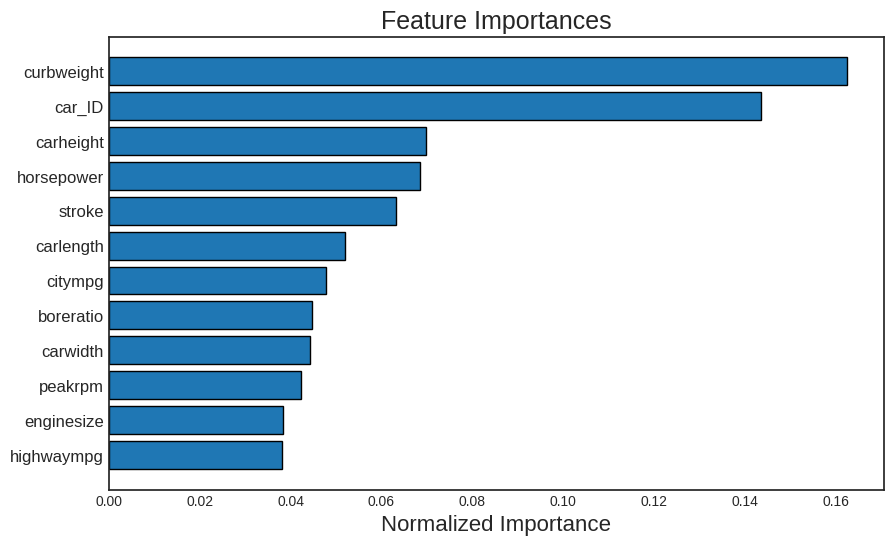

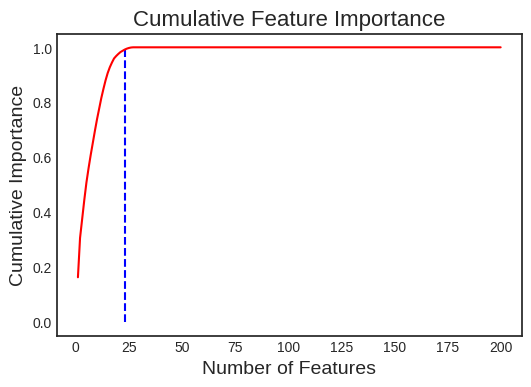

23 features required for 0.99 of cumulative importance


In [19]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [20]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,curbweight,549.2,0.162360,0.162360
1,car_ID,485.3,0.143470,0.305830
2,carheight,236.1,0.069798,0.375628
3,horsepower,231.8,0.068527,0.444155
4,stroke,213.9,0.063235,0.507391
5,carlength,175.9,0.052001,0.559392
6,citympg,161.7,0.047803,0.607196
7,boreratio,151.2,0.044699,0.651895
8,carwidth,149.9,0.044315,0.696210
9,peakrpm,142.9,0.042246,0.738456


In [21]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)

100

In [22]:
fs.identify_low_importance(cumulative_importance = 0.99)

22 features required for cumulative importance of 0.99 after one hot encoding.
178 features do not contribute to cumulative importance of 0.99.



In [23]:
low_importance_features = fs.ops['low_importance']
low_importance_features

['carbody_wagon',
 'fuelsystem_2bbl',
 'drivewheel_fwd',
 'cylindernumber_four',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x4',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_honda civic cvcc',
 'CarName_alfa-romero Quadrifoglio',
 'CarName_Nissan versa',
 'CarName_dodge monaco (sw)',
 'CarName_buick opel isuzu deluxe',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge colt hardtop',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge dart custom',
 'CarName_plymouth duster',
 'CarName_honda prelude',
 'CarName_buick electra 225 custom',
 'CarName_dodge rampage',
 'CarName_honda accord cvcc',
 'C

In [24]:

train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [25]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 173 features.


In [26]:

all_to_remove = fs.check_removal()
all_to_remove

Total of 178 features identified for removal


['CarName_chevrolet monte carlo',
 'CarName_honda civic',
 'CarName_nissan dayz',
 'CarName_mazda glc custom l',
 'enginetype_ohcv',
 'CarName_plymouth duster',
 'CarName_isuzu D-Max V-Cross',
 'CarName_subaru baja',
 'CarName_volvo 145e (sw)',
 'carbody_hardtop',
 'CarName_jaguar xk',
 'CarName_mitsubishi lancer',
 'cylindernumber_six',
 'aspiration_turbo',
 'CarName_nissan clipper',
 'carbody_wagon',
 'CarName_porsche macan',
 'CarName_bmw x1',
 'CarName_mazda glc custom',
 'CarName_volkswagen 411 (sw)',
 'CarName_toyota tercel',
 'CarName_volkswagen rabbit',
 'CarName_dodge colt hardtop',
 'CarName_nissan titan',
 'cylindernumber_two',
 'CarName_dodge dart custom',
 'CarName_bmw 320i',
 'CarName_audi 100ls',
 'CarName_honda civic 1500 gl',
 'CarName_nissan otti',
 'CarName_porsche cayenne',
 'CarName_honda accord lx',
 'CarName_peugeot 504 (sw)',
 'CarName_nissan kicks',
 'CarName_peugeot 504',
 'CarName_buick opel isuzu deluxe',
 'fuelsystem_spdi',
 'fuelsystem_1bbl',
 'drivewheel_

In [27]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 178 features.


In [28]:

train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 185 features including one-hot features.


In [29]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 25
Final Number of Features:  25


In [32]:
fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'regression', 'eval_metric': 'l2', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[315]	valid_0's l2: 5.8328e+06
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[99]	valid_0's l2: 9.67386e+06
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[937]	valid_0's l2: 5.19683e+06
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[998]	valid_0's l2: 5.14942e+06
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[494]	valid_0's l2: 5.79799e+06
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[486]	valid_0's l2: 4.90515e+06
Training un

In [33]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 178 features.


In [41]:
fs.feature_importances[fs.feature_importances['importance'] > 0]


,feature,importance,normalized_importance,cumulative_importance
0,curbweight,426.1,0.140164,0.140164
1,car_ID,411.0,0.135197,0.275362
2,carheight,228.6,0.075197,0.350559
3,horsepower,227.8,0.074934,0.425493
4,stroke,182.8,0.060132,0.485625
5,peakrpm,163.2,0.053684,0.539309
6,boreratio,162.0,0.053289,0.592599
7,carlength,151.2,0.049737,0.642336
8,citympg,148.5,0.048849,0.691184
9,wheelbase,138.8,0.045658,0.736842


In [43]:
pip install tpot

     |████████████████████████████████| 81kB 1.5MB/s 
     |████████████████████████████████| 10.1MB 4.2MB/s 
     |████████████████████████████████| 163kB 38.1MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 20.2MB 159kB/s 
     |████████████████████████████████| 7.1MB 24.6MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=5a4e95c5ecf4b143f156d42a434909f18b30d9c1df769bf4a4dfcc1b3de2ce9e
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.1.2 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.1.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.25.0; python_version >= "3.0", but you'll have pandas 1.0.0 which is incompatible.
ERROR: feature-selector 1

ImportError: ignored